# Machine Learning:
Machine Learning is the subset of AI which gives the machine the ability to use the stat model to learn
from the data.

Machine Learning is used to:
Detect patterns in the dataset,
Find hidden insights from the data,
Automate analytical and statistical model building

Steps of Machine Learning:
1. Data collection
2. Data analysis
3. Data wrangling/Feature engineering
4. Train/Test Algorithms
5. Model Selection
6. Hyperparameter Tuning/Optimisation
7. Prediction/Deployment

# Scenario 1:Iris Prediction
You are provided the 'Iris' dataset. You have to predict species of the ßowers based on the given
features. You have to predict the 'Class' feature which contains 3 species namely, Iris-Setosa, IrisVirginica, and Iris-Versicolor.

### Topics Covered:
* Data collection
* Data analysis
* Data wrangling/Feature engineering
* Train/Test Algorithms
* Predicting using the trained model
* Evaluating a model: F1-score and Confusion matrix

### Dataset Description:
The dataset contains 5 features:
1. sepal length (cm): length of the sepal
2. sepal width (cm): width of the sepal
3. petal length (cm): length of the petal
4. petal width (cm): width of the petal
5. class: species of the iris flower

### Tasks to be performed:

1. Load the data, check its shape and check for null values - Beginner
2. Handle null values based on the given threshold - Beginner
3. Convert categorical to numerical feature using Label Encoder - Beginner
4. Handle outlier values - Intermediate
5. Plot and analyze Correlation - Beginner
6. Split the dataset for training and testing - Beginner
7. Perform K-Fold cross validation over di!erent classiÞcation algorithm - Intermediate
8. Train a logistic regression model and perform prediction on test data - Beginner
9. Evaluate the model using confusion matrix and F1-score - Beginner



In [2]:
!wget https://www.dropbox.com/s/webw4cr5dsnm3jv/iris1.csv

--2022-01-19 10:33:27--  https://www.dropbox.com/s/webw4cr5dsnm3jv/iris1.csv


### Question-1: Load and analyze the data
#### Tasks to do:

- Load the data in a pandas DataFrame
- Have a look at the first five rows
- Check if the dataset contains any null values
- Check the shape of the dataset

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('iris1.csv')

In [2]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,Iris-Setosa
1,4.9,3.0,1.4,0.2,Iris-Setosa
2,4.7,3.2,1.3,0.2,Iris-Setosa
3,4.6,3.1,1.5,0.2,Iris-Setosa
4,5.0,NaN,1.4,0.2,Iris-Setosa


In [3]:
print('The shape of the data:',df.shape)

The shape of the data: (150, 5)


In [4]:
print('The null values in each are:','\n', df.isnull().sum())

The null values in each are: 
 sepal length (cm)     0
sepal width (cm)     30
petal length (cm)    68
petal width (cm)      0
Class                 0
dtype: int64


### Question-2: Handle null values
#### Tasks to do:
- Handle null values
- If a column has more than 40% null values, drop that column
- Else fill the null values with mean of that column

In [5]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Class'],
      dtype='object')

In [6]:
0.40*150

60.0

In [7]:
for column in list(df.columns):
    print(column)

sepal length (cm)
sepal width (cm)
petal length (cm)
petal width (cm)
Class


In [11]:
for column in df.columns:
    if df[column].isnull().sum() > (0.40*150):
        df.drop(columns=column,axis=1,inplace=True)
    elif df[column].isnull().sum():
        df[column].replace(np.nan,df[column].mean(),inplace=True)
    else:
        continue

In [12]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal width (cm)     0
Class                0
dtype: int64

In [13]:
df

,sepal length (cm),sepal width (cm),petal width (cm),Class
0,5.1,3.5000,0.2,Iris-Setosa
1,4.9,3.0000,0.2,Iris-Setosa
2,4.7,3.2000,0.2,Iris-Setosa
3,4.6,3.1000,0.2,Iris-Setosa
4,5.0,3.0575,0.2,Iris-Setosa
...,...,...,...,...
145,6.7,3.0000,2.3,Iris-Virginica
146,6.3,2.5000,1.9,Iris-Virginica
147,6.5,3.0000,2.0,Iris-Virginica
148,6.2,3.0575,2.3,Iris-Virginica


### Question-3: We can not use string objects for prediction so convert categorical feature to numerical feature
#### Tasks to do:
Convert the categorical features to numerical values using Label Encoder from sklearn

In [14]:
df.head()

,sepal length (cm),sepal width (cm),petal width (cm),Class
0,5.1,3.5000,0.2,Iris-Setosa
1,4.9,3.0000,0.2,Iris-Setosa
2,4.7,3.2000,0.2,Iris-Setosa
3,4.6,3.1000,0.2,Iris-Setosa
4,5.0,3.0575,0.2,Iris-Setosa


In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

In [16]:
df['Class'].value_counts()

0    50
1    50
2    50
Name: Class, dtype: int64

In [17]:
df.head()

,sepal length (cm),sepal width (cm),petal width (cm),Class
0,5.1,3.5000,0.2,0
1,4.9,3.0000,0.2,0
2,4.7,3.2000,0.2,0
3,4.6,3.1000,0.2,0
4,5.0,3.0575,0.2,0


### Question-4: Handle outlier
#### Tasks to do:
- Check for outlier in all the columns using boxplot.
- If there are outliers, clip them, lower limit will be Q1-1.5 IQR and upper limit will be Q3+1.5 IQR.
- Q1 = 1st Quartile (25%)
- Q3 = 3rd Quartile (75%)
- IQR = Inter-quartile range (Q3-Q1)

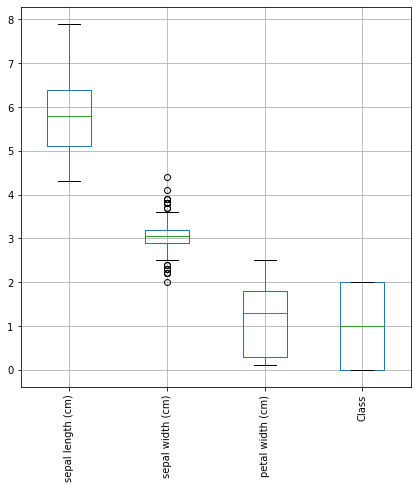

In [29]:
import matplotlib.pyplot as plt

df.boxplot(figsize=(7,7))
plt.xticks(rotation=90)
plt.show()


Sepal width contains outliers, so we will need to cap them.

In [34]:
q1 = df['sepal width (cm)'].quantile(.25)
q3 = df['sepal width (cm)'].quantile(.75)
IQR = q3-q1

In [38]:
df['sepal width (cm)'] = np.clip(df['sepal width (cm)'],q1 - 1.5 * IQR, q3+1.5 * IQR)

0      3.5000
1      3.0000
2      3.2000
3      3.1000
4      3.0575
        ...  
145    3.0000
146    2.5000
147    3.0000
148    3.0575
149    3.0000
Name: sepal width (cm), Length: 150, dtype: float64

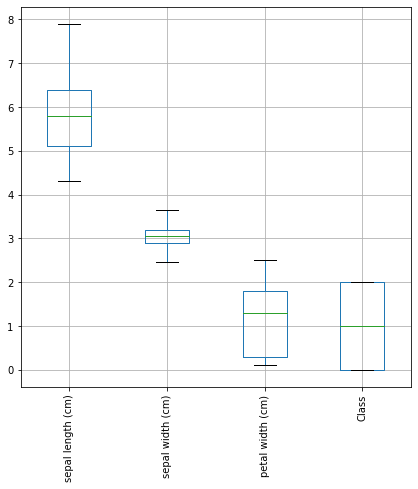

In [40]:
df.boxplot(figsize=(7,7))
plt.xticks(rotation=90)
plt.show()

Now we can see there are no outliers left


# Question-5: Plot the correlation and tell which feature will help the most during prediction

- Calculate correlation
- Plot the correlation
- Compare the correlation

<AxesSubplot:>

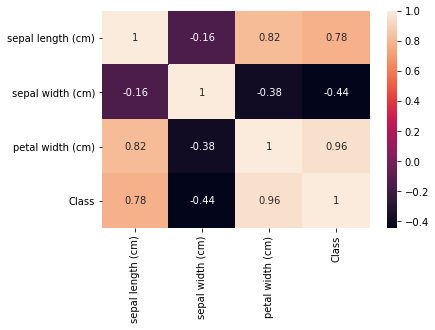

In [44]:
import seaborn as sns
sns.heatmap(df.corr(), annot = True)

Petal width and sepal length are highly correlated with feature Class

### Question-6: Split the data into training and testing datasets
#### Tasks to do:
- Split the dataset using sklearn, with 20% for testing with random_state=7

In [45]:
from sklearn.model_selection import train_test_split


In [70]:
X = df.drop(labels='Class',axis=1)
y = df['Class']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [78]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(120, 3) (30, 3) (120,) (30,)
